<div style="display: flex; align-items: center;">
    <img src="https://http2.mlstatic.com/concha-de-abulon-en-bruto-por-kilo-D_NQ_NP_3729-MLM4623475852_072013-F.jpg" alt="Abalone image" width="200" style="margin-left: 20px;"/>
    <h1>Abalone by Michel Corona</h1>
</div>

<div class="alert alert-info">
<b>.: Problem statement :.</b>
</div>

Determining the age of abalones, valuable marine mollusks, is traditionally a slow and invasive method, requiring shell cutting to count growth rings. This approach threatens abalone populations and complicates resource management. The study aims to develop a non-invasive, accurate **machine learning model for predicting abalone age** using physical attributes like shell size and weight. A reliable model will improve age estimation and aid in the sustainable management of abalones.

In [ ]:
!pip install ucimlrepo
!pip install pandas-profiling
!pip install missingno #helps to visualise the missing values in a pandas dataframe.

In [90]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Statistical Analysis
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Profiling and Miscellaneous
from ydata_profiling import ProfileReport

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features 
y = abalone.data.targets 


In [4]:
# variable information 
print(abalone.variables) 

             name     role         type demographic  \
0             Sex  Feature  Categorical        None   
1          Length  Feature   Continuous        None   
2        Diameter  Feature   Continuous        None   
3          Height  Feature   Continuous        None   
4    Whole_weight  Feature   Continuous        None   
5  Shucked_weight  Feature   Continuous        None   
6  Viscera_weight  Feature   Continuous        None   
7    Shell_weight  Feature   Continuous        None   
8           Rings   Target      Integer        None   

                   description  units missing_values  
0         M, F, and I (infant)   None             no  
1    Longest shell measurement     mm             no  
2      perpendicular to length     mm             no  
3           with meat in shell     mm             no  
4                whole abalone  grams             no  
5               weight of meat  grams             no  
6  gut weight (after bleeding)  grams             no  
7        

In [21]:
df = pd.concat([X, y], axis=1)

In [20]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## EDA

I attached you the html file, please take a look on "output.html"

In [18]:
profile = ProfileReport(df, title="Profiling Report")
profile.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


## Descriptive Statistics

In [19]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## Looking for missing values

Quick visual summary of the completeness/incompleteness of the dataset

<Axes: >

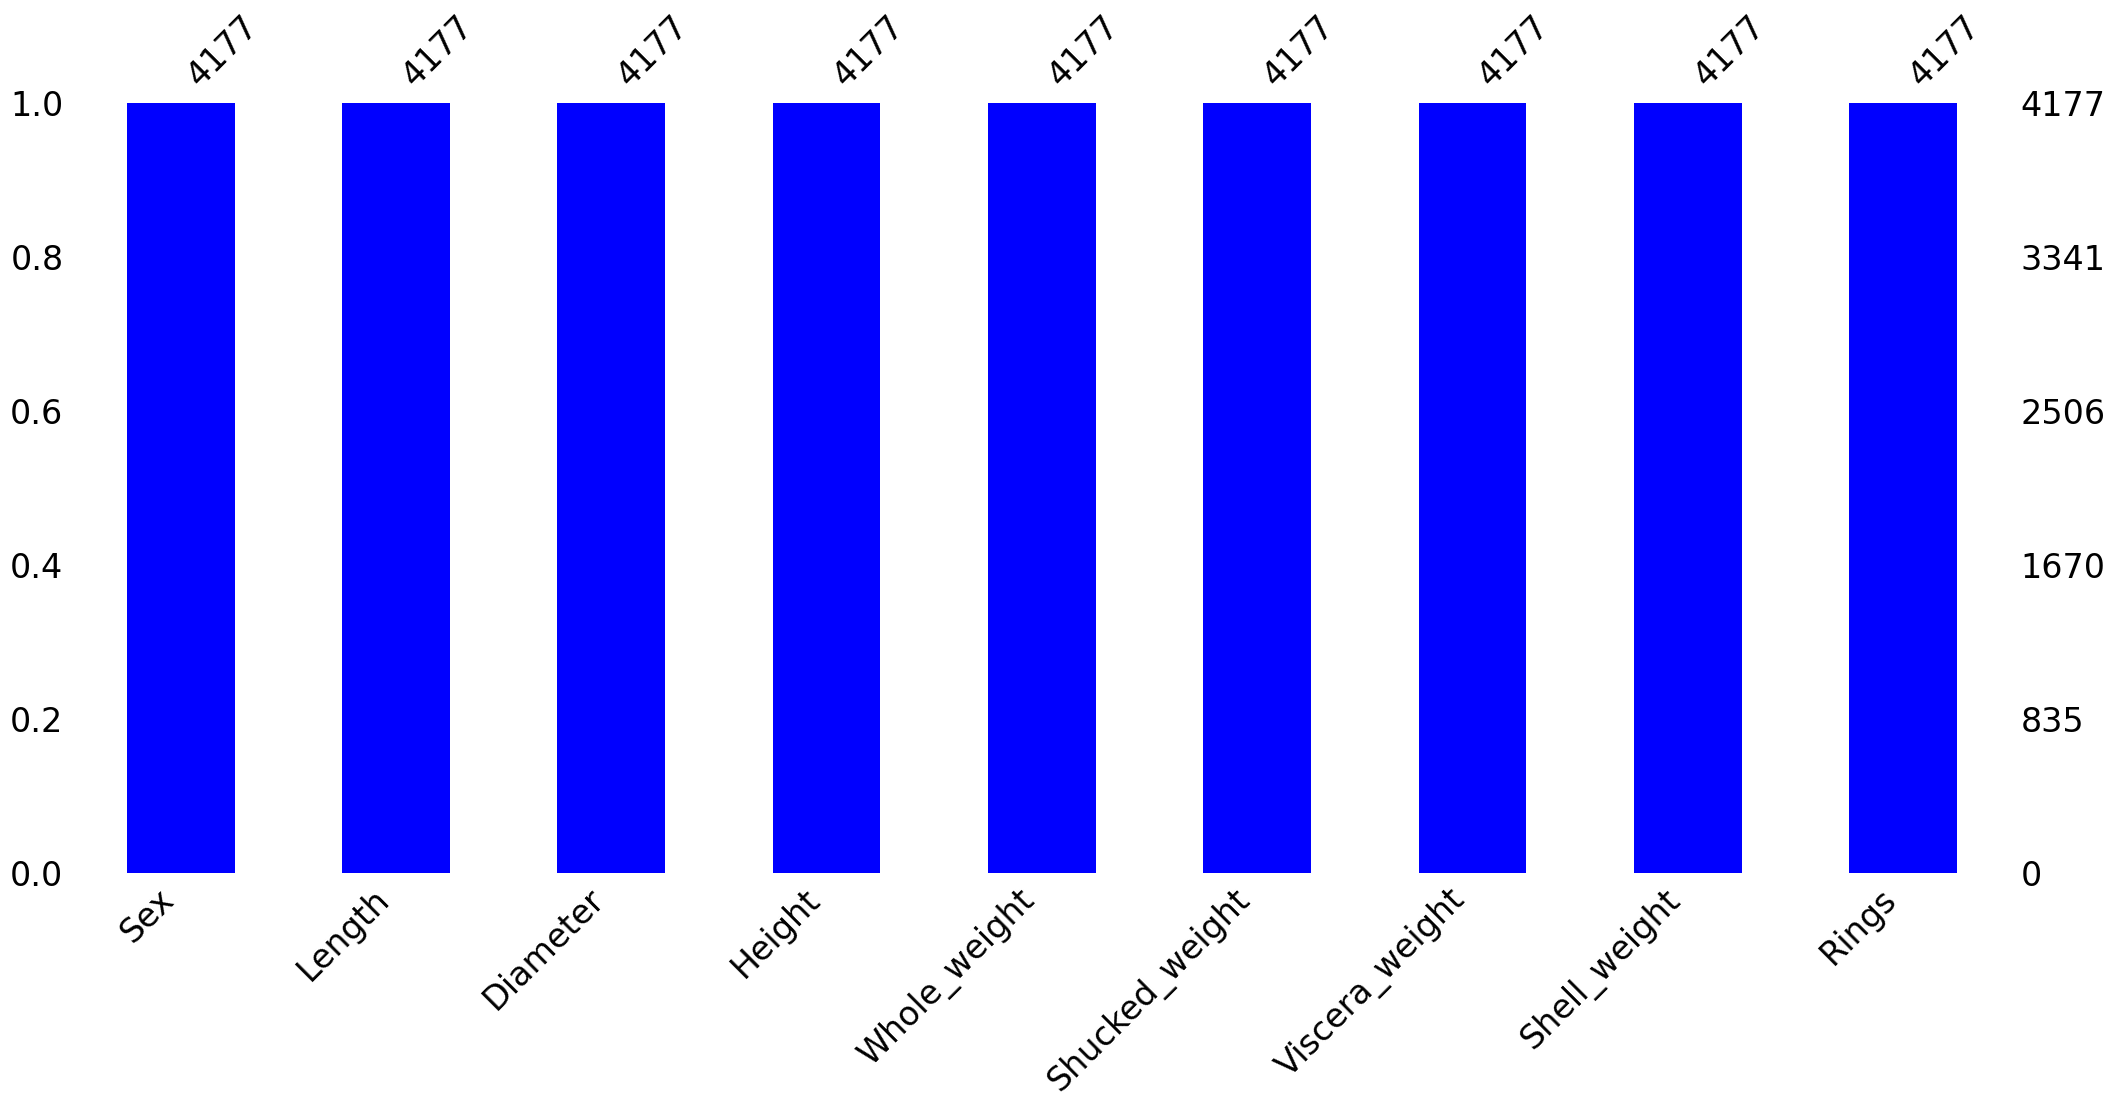

In [22]:
msno.bar(df,fontsize = 24, color = 'blue')

<Axes: >

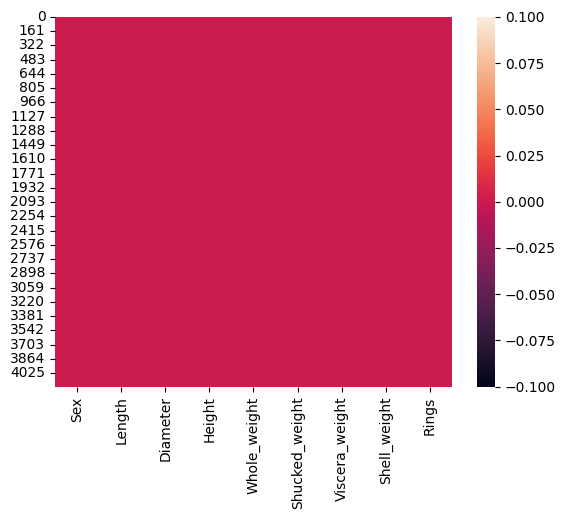

In [23]:
sns.heatmap(df.isnull())

So, we conclude that there are **no missing values** in our dataset

## Analysis

In [27]:
df[df['Height'] == 0]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


As we can see, under height column, the minimum value is 0. (Not possible) Let's look the distribution:

<Axes: xlabel='Height', ylabel='Density'>

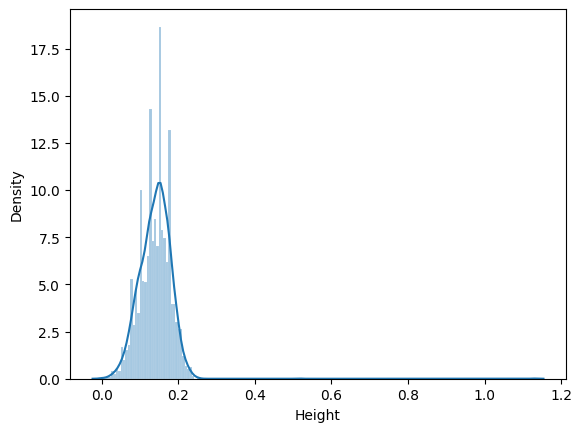

In [30]:
sns.histplot(df["Height"], kde=True,stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),)

Based on this graph, it appears that most of the height values are concentrated around a central range and there are very few values close to 0.0, indicating that height values at 0.0 are outliers or possible measurement errors.

An imputation using the median of the height data might be appropriate, as it is robust against outliers and will better reflect the central tendency of the data without being affected by extreme values.

On the other hand, if the number of observations with height at 0.0 is very small compared to the total size of the data set, and if removing these records is not going to bias the analysis, it might be simpler and less intrusive to simply remove these records.

Since only two records out of a total of 4177 have a height value of 0.0, this represents approximately 0.048% of the data set. It is a very small fraction, I propose to eliminate these two records.

In [31]:
df.drop(index=[1257,3996], inplace = True)
df.shape

(4175, 9)

## Looking for the target or dependant variable

In [32]:
df['Age'] = df['Rings']+1.5 #As per the problem statement
df.drop('Rings', axis = 1, inplace = True)
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


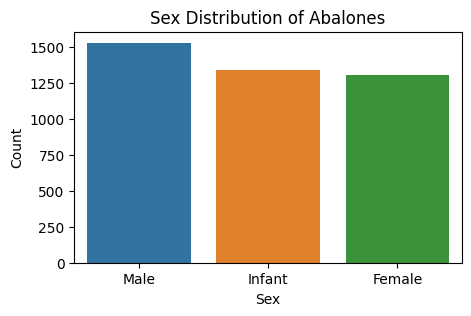

In [8]:
# Plotting with Seaborn
plt.figure(figsize=(5,3))
sns.countplot(x='Sex', data=X, order=['M', 'I', 'F'])
plt.xticks(ticks=[0, 1, 2], labels=['Male', 'Infant', 'Female']) # Adjusting tick labels if necessary
plt.ylabel('Count')
plt.title('Sex Distribution of Abalones')
plt.show()

## Understanding the Distribution of the Numerical Features

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Whole_weight'}>],
       [<Axes: title={'center': 'Shucked_weight'}>,
        <Axes: title={'center': 'Viscera_weight'}>,
        <Axes: title={'center': 'Shell_weight'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

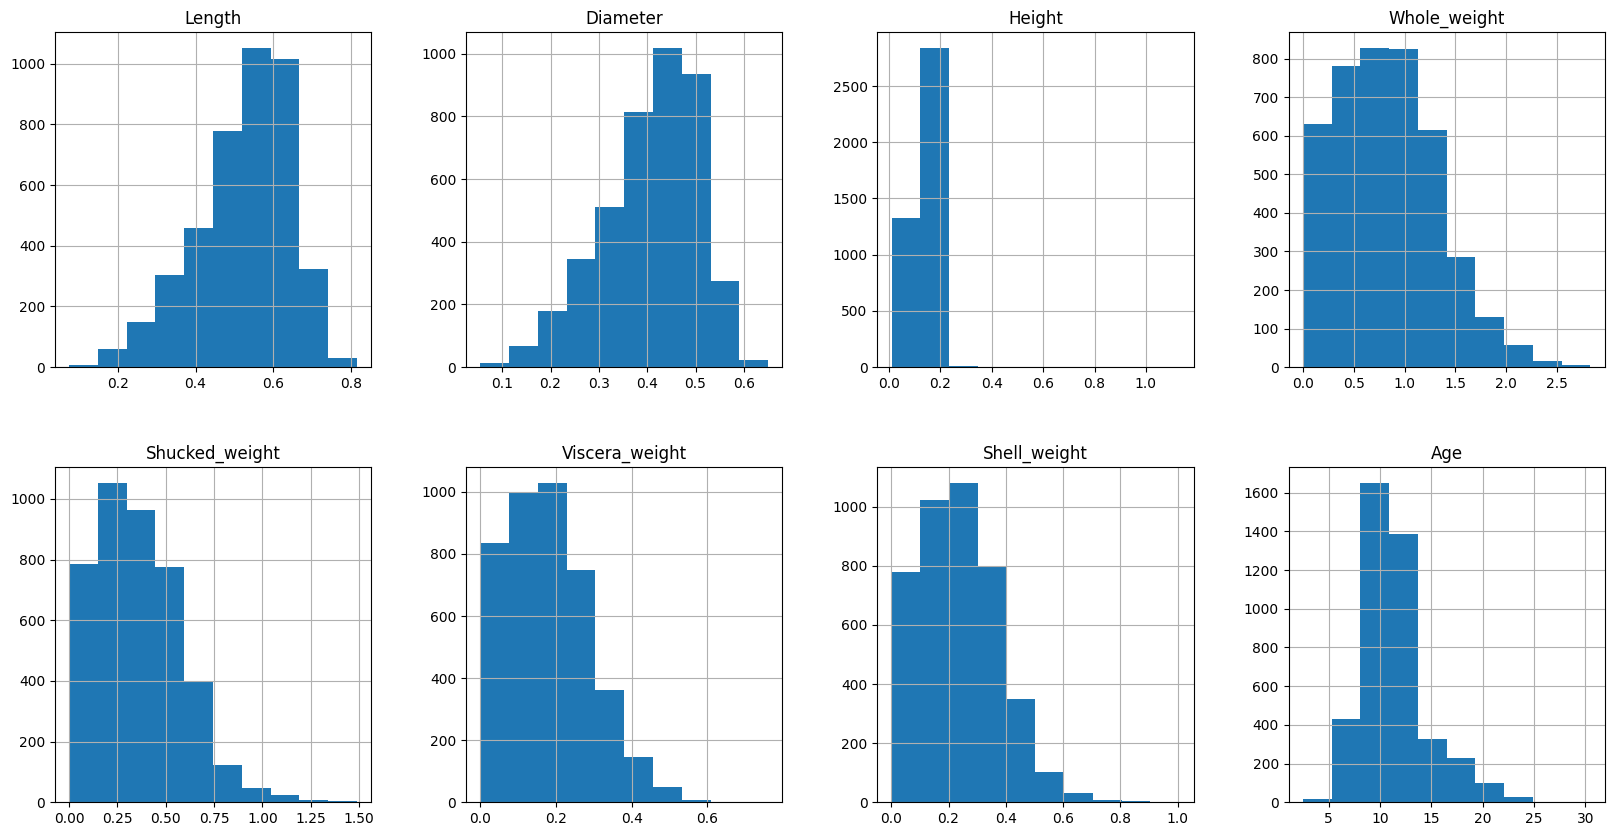

In [34]:
df.hist(figsize = (20,10), layout = (2,4))

Skewness of the height is too high. (normalise later...)
We have to check skewness for all varibles


### Skewness of variables

In [37]:
numvar = df.select_dtypes(include=['float64','int64'])

In [39]:
numvar.skew().sort_values(ascending = False)

Height            3.166364
Age               1.113754
Shucked_weight    0.718735
Shell_weight      0.621081
Viscera_weight    0.591455
Whole_weight      0.530549
Diameter         -0.610182
Length           -0.640993
dtype: float64

Skewness is close to 0 for Normal distribution curve.
Height has the highest skewness of 3.17.

*Next steps:*
Check the coorelation with the dependent variable and  use IQR algorithm to remove outliers.

### Correlation plot

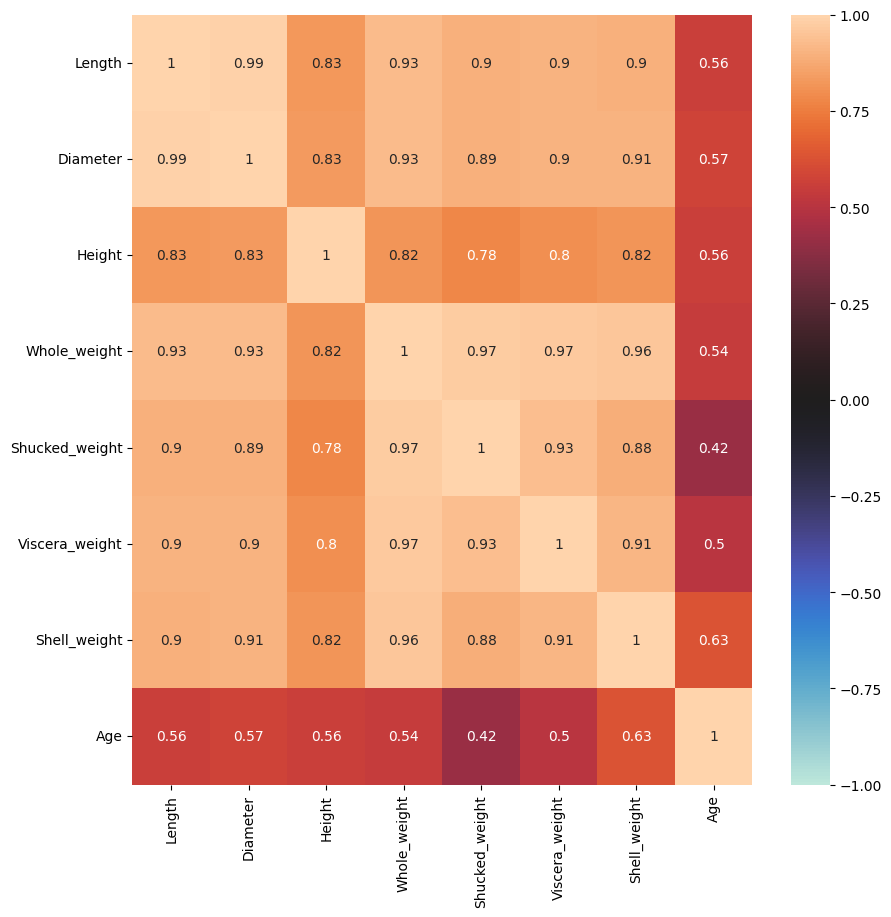

In [43]:
corr = numvar.corr()
plt.figure(figsize = (10,10))
ax = sns.heatmap(corr, vmin = -1, center = 0, annot = True)

* No Negative correlation found
* High coorelation between Length & Diameter
* High corelation between shucked weight, viscera weight Vs Whole_weight & Shell weight vs Whole_weight

## Selecting variables

In [48]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
columns_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)] #highly correlated variables to be removed.

print("Columns to drop:\n", columns_to_drop)

Columns to drop:
 ['Diameter', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']


C:\Users\074002781\AppData\Local\Temp\ipykernel_1520\975313807.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))


### Dropping columns

In [49]:
df.drop(columns_to_drop, axis=1, inplace = True) #Remove highly correlated predictors from the model.

In [50]:
df.head()

,Sex,Length,Height,Whole_weight,Age
0,M,0.455,0.095,0.5140,16.5
1,M,0.350,0.090,0.2255,8.5
2,F,0.530,0.135,0.6770,10.5
3,M,0.440,0.125,0.5160,11.5
4,I,0.330,0.080,0.2050,8.5


## Normalise Height

In [52]:
df['Height'] = np.sqrt(df['Height']) #By doing Square root transformation

### Checking skewness again

In [56]:
numvar = df.select_dtypes(include=['float64','int64'])
numvar.skew().sort_values(ascending = False)

Age             1.113754
Whole_weight    0.530549
Height         -0.176012
Length         -0.640993
dtype: float64

All **independent varibles** values are close to zero. So, they are now close to gaussian distribution.

## Calculating VI

In [60]:
def vif_arr(df1):
    vif = pd.DataFrame()
    df1 = sma.add_constant(df1)
    vif["Features"] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    return(vif)

In [66]:
temp = df.drop('Sex', axis = 1) #i.e. categorical
vif_arr(temp).sort_values(by = 'Features', ascending = False)

,Features,VIF
0,const,107.392429
3,Whole_weight,7.126838
1,Length,9.458458
2,Height,5.229923
4,Age,1.561926


Length have slighter higher VIF. Let's see if we can transformate the variable:

In [68]:
df['Length'] = np.sqrt(df['Length'])

In [69]:
temp = df.drop('Sex', axis = 1) #i.e. categorical
vif_arr(temp).sort_values(by = 'Features', ascending = False)

,Features,VIF
0,const,227.718450
3,Whole_weight,5.437019
1,Length,7.421286
2,Height,5.529728
4,Age,1.563922


## Model

In [72]:
Age = []
for i in df["Whole_weight"]:
    if i < 0.6:
        Age.append(1)
    elif i > 0.6 and i < 1.0 :
        Age.append(2)
    else:
        Age.append(3)
df["Age"] = Age
#df_1.drop("age" , axis =1,inplace=True)
df.head()

,Sex,Length,Height,Whole_weight,Age
0,M,0.674537,0.308221,0.5140,1
1,M,0.591608,0.300000,0.2255,1
2,F,0.728011,0.367423,0.6770,2
3,M,0.663325,0.353553,0.5160,1
4,I,0.574456,0.282843,0.2050,1


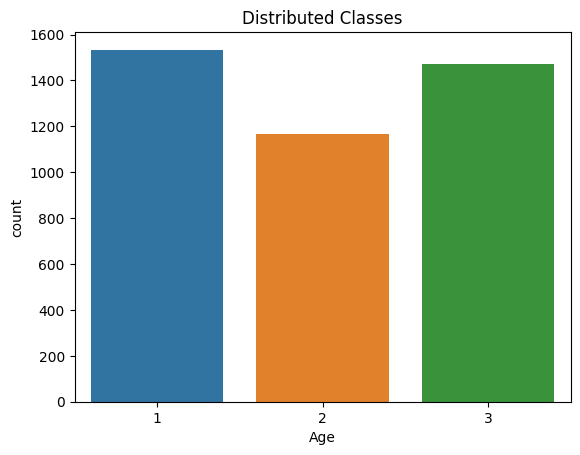

In [76]:
sns.countplot(x='Age', data=df)
plt.title('Distributed Classes')
plt.show()


### Get dummies of varible Sex

In [78]:
new_df = pd.get_dummies(df, columns = ['Sex'], prefix_sep='_', drop_first = True)
new_df['Age'].value_counts()

Age
1    1534
3    1473
2    1168
Name: count, dtype: int64

In [93]:
X = new_df.drop('Age', axis = 1)
y = new_df['Age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)
X_test_std = pd.DataFrame(X_test_std, columns=X_train.columns)

X_train = X_train_std.values
X_test = X_test_std.values
y_train = y_train.values
y_test = y_test.values

classifiers = {"LogisiticRegression": LogisticRegression(),
               "LinearRegression": LinearRegression(),
               "KNearest": KNeighborsClassifier(),
               "Support Vector Classifier": SVC(),
               "DecisionTreeClassifier": DecisionTreeClassifier(),
               "PLSRegression": PLSRegression(n_components=3)}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression has a training score of 98.0 % accuracy score
Classifiers:  LinearRegression has a training score of 81.0 % accuracy score
Classifiers:  KNeighborsClassifier has a training score of 97.0 % accuracy score
Classifiers:  SVC has a training score of 97.0 % accuracy score
Classifiers:  DecisionTreeClassifier has a training score of 100.0 % accuracy score
Classifiers:  PLSRegression has a training score of 81.0 % accuracy score


<div class="alert alert-block alert-success">
<b>.: The end :.</b>
</div>